# Logistic Regression 

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loading the data

In [108]:
df = pd.read_csv("/content/Compute_ML_Task.csv")
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The following code divides data into attributes and labels



In y we are keeping the attribute that we want to predict i.e class

In [109]:
Y = df['Class']
X = df.drop(columns=['Class'], axis=1)

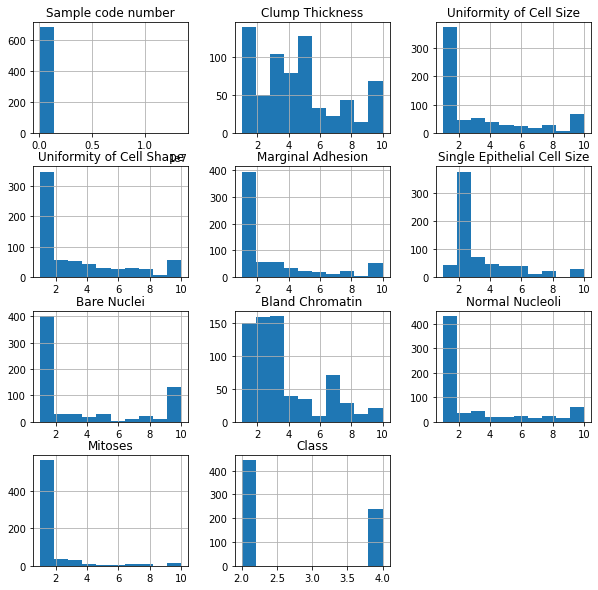

In [110]:
df.hist(figsize = (10,10))
plt.show()

A histogram is a graphical representation commonly used to visualize the distribution of numerical data.

‘clump thickness’ is evenly distributed to some extent. All other variables are skewed to the right.


<Figure size 360x360 with 0 Axes>

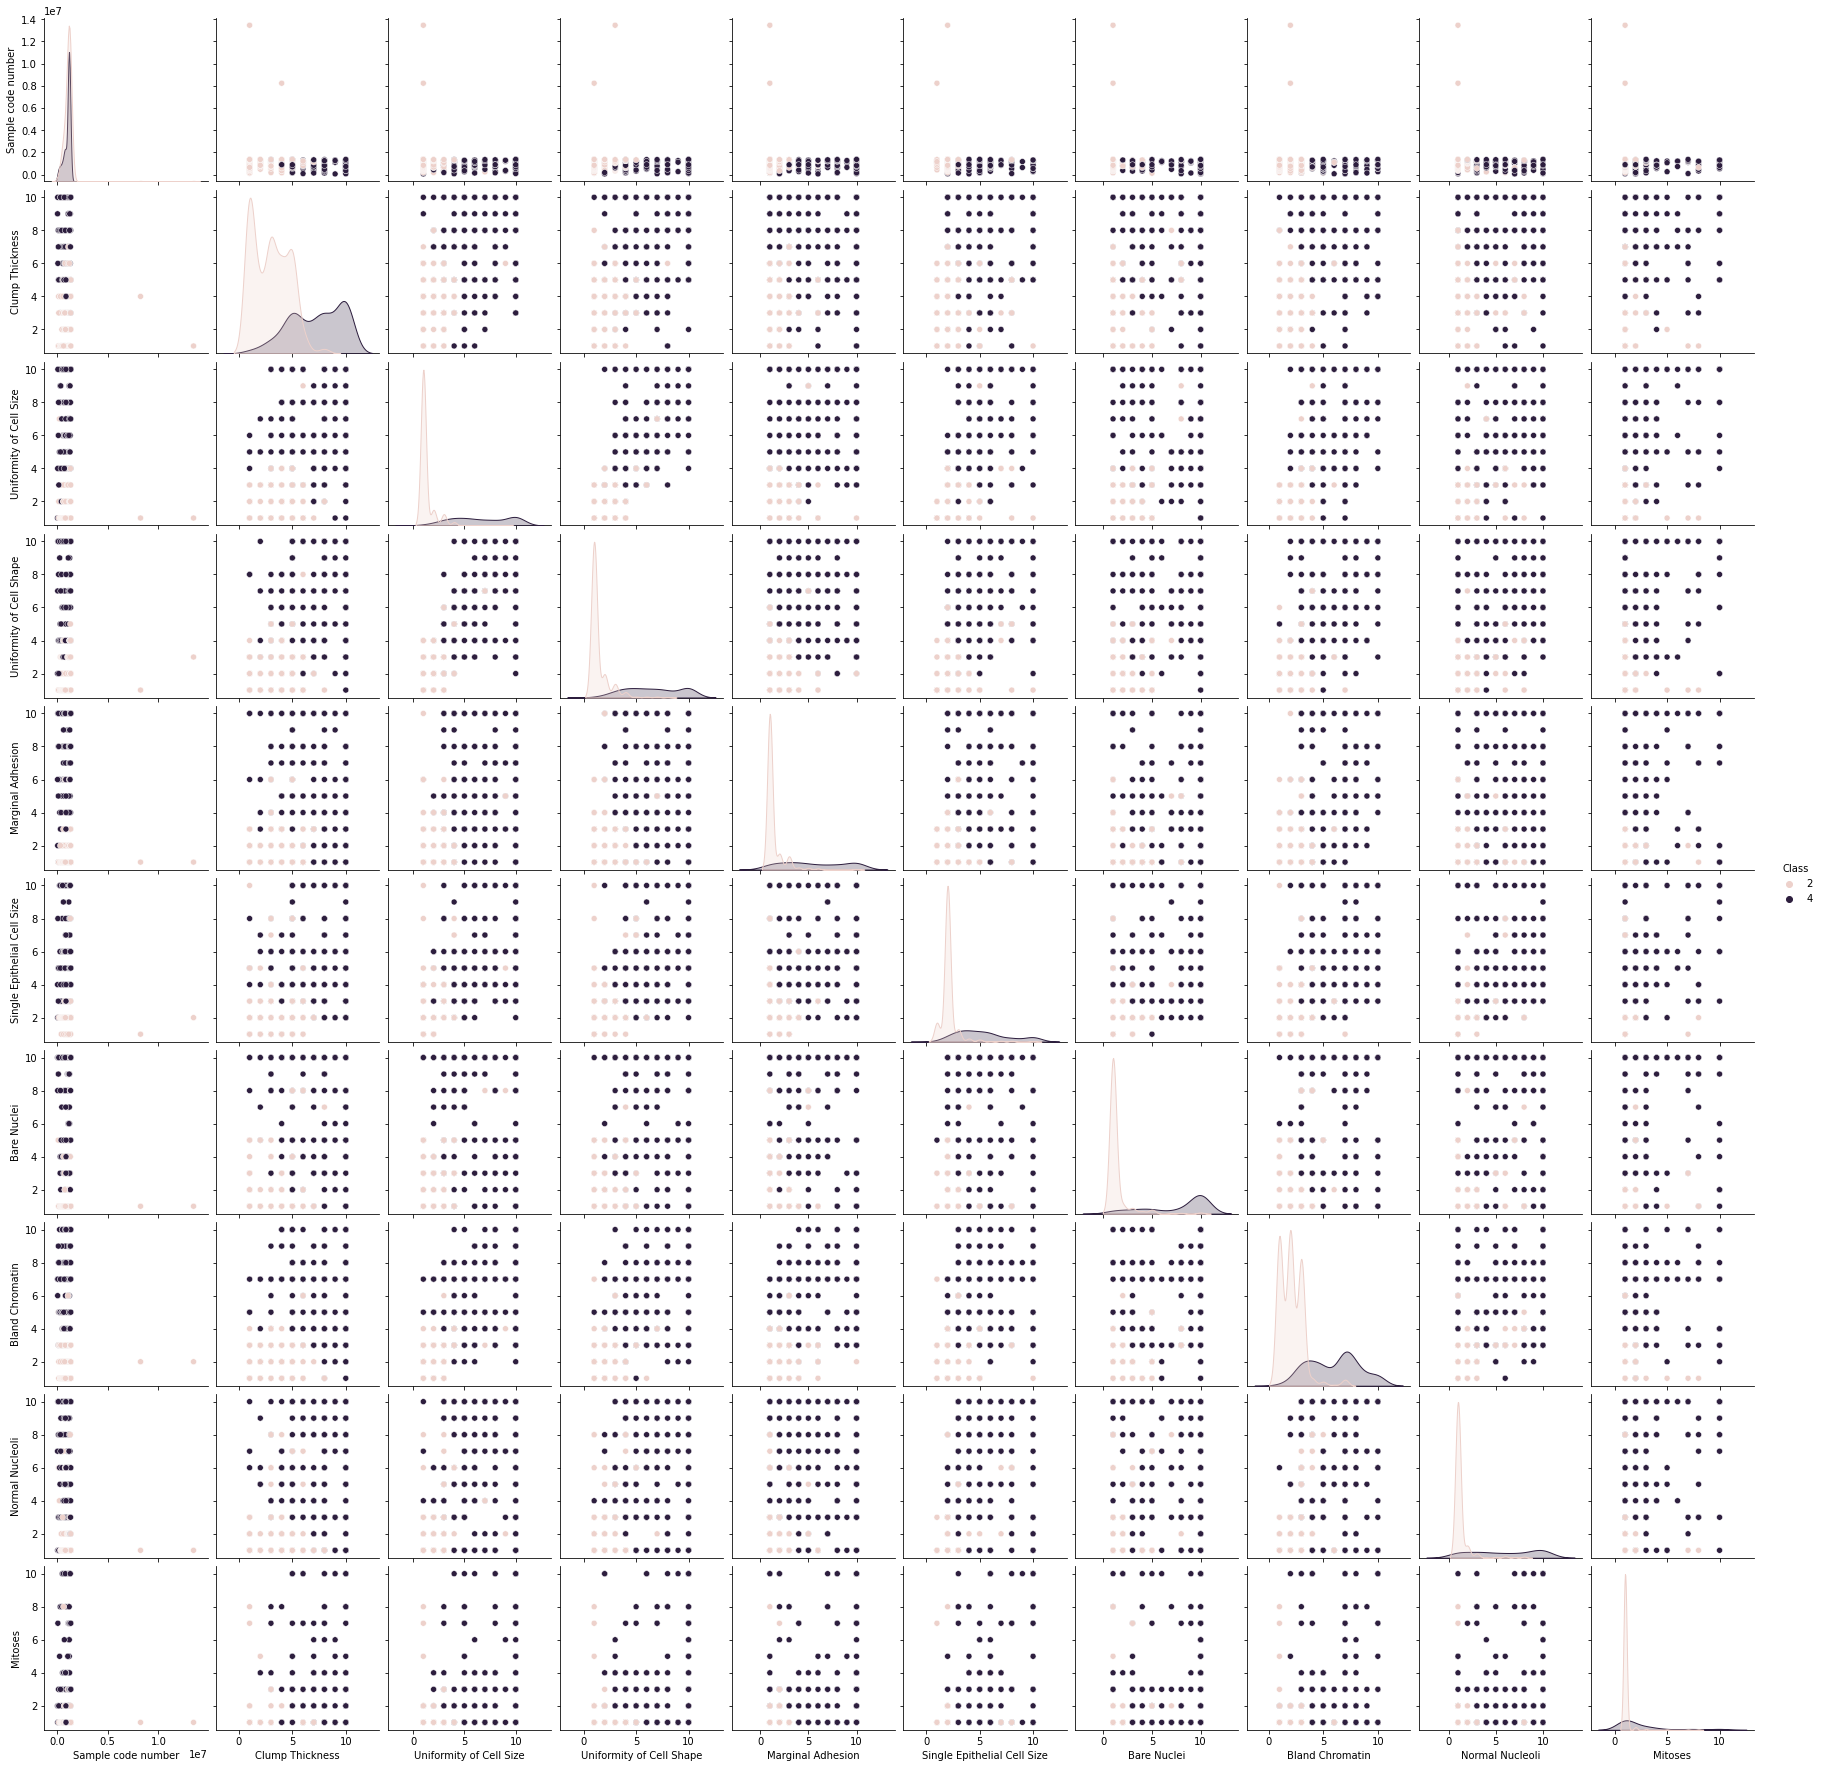

In [111]:
plt.figure(figsize = (5,5))
sns.pairplot(data=df, hue='Class')

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.

This pairplot can be used to find relations between different attributes like Clump Thickness, Uniformity Cell Size etc.

‘uniformity of cell size’ seems to have a strong linear relationship with ‘uniformity of cell shape’.


In [112]:
correlation=df.corr()
correlation

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python

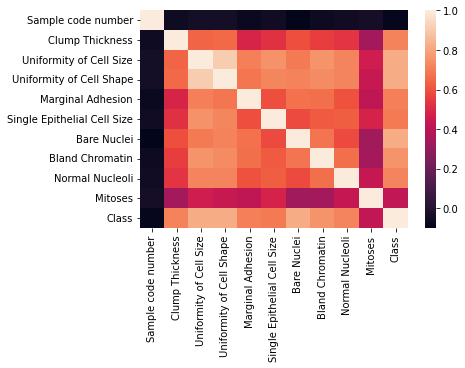

In [113]:
ax = sns.heatmap(correlation)
ax

using the heatmap we can see which columns have high correlation

# Splitting the dataset

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [115]:

print(y_test)

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 2 4 2 4 2 4 4 4 2 4 4 4 2 2 2 4 4 2 2 4 4 2 2 4
 2 2 4 2 2 2 4 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2 4 2 2 2 4 2 2 2 2 4 2
 4 2 4 4 2 2 2 2 4 4 2 4 4 4 4 4 4 2 2 2 2 2 2]


In [116]:
print(y_train)

[4 4 4 2 2 2 4 2 2 4 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 4
 2 2 4 2 2 4 2 2 2 2 2 4 2 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2
 4 2 2 4 2 2 2 2 2 2 2 4 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 4 2 4 2 2 4 2 2 2 2
 2 2 2 4 4 4 4 2 4 2 4 2 4 4 4 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 4 2 2 2 2 4 4
 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 2 4 2 2 2 2 4 2
 4 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4
 2 2 2 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 4 2 4 2 2 2 4 4 4 2 2 2 2 2 2 2
 2 4 4 2 2 2 2 2 2 2 4 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 2
 2 2 4 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 2 4 2 4 2 2 4 2 4 4 4 2 2 2 4 2 4 4 4
 2 2 2 4 2 4 2 2 2 2 4 4 2 2 2 4 4 2 2 4 2 2 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2
 4 2 2 2 2 4 4 2 2 4 4 2 2 4 4 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2
 4 2 4 2 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 4 4 4 4 2 4 4 2 4 4 2 2 2 2 2 2 4 2
 2 2 2 4 4 2 4 4 4 2 2 4 

In [117]:
print(X_test)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
113             1173347                1                        1   
378             1156017                3                        1   
303              706426                5                        5   
504             1330439                4                        7   
301              693702                1                        1   
..                  ...              ...                      ...   
443             1266124                5                        1   
159             1197979                4                        1   
317              764974                5                        1   
78              1137156                2                        2   
92              1160476                2                        1   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
113                         1                  1                            2   
378      

In [118]:
print(X_train)

     Sample code number  Clump Thickness  Uniformity of Cell Size  \
556              142932                7                        6   
66              1120559                8                        3   
571             1254538                8                       10   
299              688033                1                        1   
355              428598                1                        1   
..                  ...              ...                      ...   
9               1033078                4                        2   
359              521441                5                        1   
192             1214092                1                        1   
629             1303489                3                        1   
559              378275               10                        9   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
556                        10                  5                            3   
66       

# Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.


They are of 2 types

1)Normalisation
2)Standardization

In [119]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [120]:
print(X_train)

[[-1.38219432  0.91903747  0.9407658  ...  2.22576767  2.27129602
   0.24623928]
 [ 0.03390689  1.27578287 -0.04290763 ...  1.82407819  1.94996317
   3.74830911]
 [ 0.22797663  1.27578287  2.25233038 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [ 0.16939025 -1.22143494 -0.69868992 ... -0.98774815 -0.62069958
  -0.33743902]
 [ 0.29888258 -0.50794414 -0.69868992 ... -0.58605867 -0.62069958
  -0.33743902]
 [-1.04129794  1.98927367  1.92443923 ...  1.42238871  1.30729749
  -0.33743902]]


In [121]:
print(X_test)


[[ 0.11037076 -1.22143494 -0.69868992 ... -0.98774815 -0.62069958
  -0.33743902]
 [ 0.08526811 -0.50794414 -0.69868992 ... -0.58605867 -0.62069958
  -0.33743902]
 [-0.56596836  0.20554667  0.61287466 ...  0.21732028  0.02196611
  -0.33743902]
 ...
 [-0.48116108  0.20554667 -0.69868992 ... -0.18436919 -0.62069958
   0.24623928]
 [ 0.05794779 -0.86468954 -0.37079877 ...  1.42238871 -0.62069958
  -0.33743902]
 [ 0.09172701 -0.86468954 -0.69868992 ... -0.18436919 -0.62069958
  -0.33743902]]


# Model Selection

In [122]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [123]:
Y_pred = classifier.predict(X_test)


To check the accuracy we need to import confusion_matrix method of metrics class. The confusion matrix is a way of tabulating the number of mis-classifications,

In [124]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, Y_pred)

accuracy_score(y_test, Y_pred)

0.9473684210526315